In [58]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold # import KFold
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [31]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [69]:
df_train= pd.read_csv('data/final_train.csv', index_col=0)
df_test = pd.read_csv('data/final_test.csv', index_col=0)
df_train_ohe = pd.read_csv('data/onehot_training.csv', index_col=0)
df_test_ohe = pd.read_csv('data/onehot_testing.csv', index_col=0)

In [70]:
df_train = df_train[['TEAM','GAME DATE','OPP','MIN', 'EFG%', 'FTA RATE', 'TOV%', 'OREB%', 'OPP_EFG%', 
                     'OPP_FTA RATE','OPP_TOV%', 'OPP_OREB%', 'REST', 'OPP_REST', 'W/L', '+/-']]

df_test = df_test[['TEAM','GAME DATE','OPP','MIN', 'EFG%', 'FTA RATE', 'TOV%', 'OREB%', 'OPP_EFG%', 
                   'OPP_FTA RATE', 'OPP_TOV%', 'OPP_OREB%', 'REST', 'OPP_REST', 'W/L', '+/-']]

In [36]:
features_names = ['EFG%', 'FTA RATE', 'TOV%', 'OREB%', 'OPP_EFG%', 
                     'OPP_FTA RATE','OPP_TOV%', 'OPP_OREB%', 'REST', 'OPP_REST']

# SVM

In [4]:
X_train_svc = df_train.iloc[:,4:14]
y_train_svc = df_train.iloc[:,-2]
X_test_svc = df_test.iloc[:,4:14]
y_test_svc = df_test.iloc[:,-2]

In [5]:
svc = SVC()

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

grid = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')

grid.fit(X_train_svc,y_train_svc)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

y_pred_best_svc = grid.best_estimator_.fit(X_train_svc, y_train_svc).predict(X_test_svc)
accuracy_score(y_test_svc, y_pred_best_svc)

0.943089430894
{'C': 10, 'kernel': 'linear'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0.66666666666666663

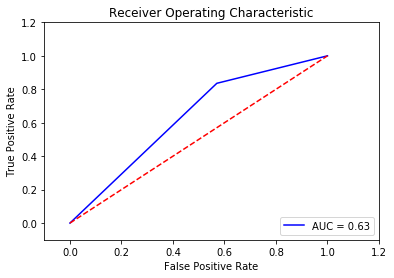

In [6]:
actual = y_test_svc
predictions=grid.best_estimator_.fit(X_train_svc, y_train_svc).predict(X_test_svc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

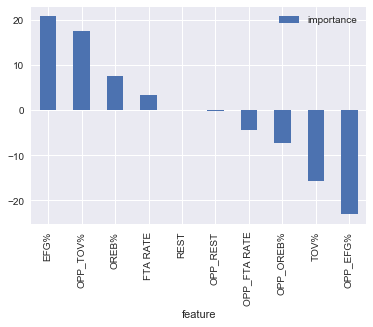

In [59]:
importances = pd.DataFrame()
importances['feature'] = features_names
importances['importance'] = [y for x in grid.best_estimator_.coef_ for y in x]

importances
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar()

# SVM with One-Hot Encoding

In [35]:
grid.best_estimator_.fit(X_train_svc, y_train_svc).coef_

array([[  2.08605880e+01,   3.34706616e+00,  -1.57340035e+01,
          7.58232861e+00,  -2.30468777e+01,  -4.27169035e+00,
          1.77214556e+01,  -7.18773539e+00,  -1.75783334e-03,
         -3.15733224e-02]])

In [7]:
X_train_svco = df_train_ohe.iloc[:,0:69]
y_train_svco = df_train_ohe.iloc[:,-2]
X_test_svco = df_test_ohe.iloc[:,0:69]
y_test_svco = df_test_ohe.iloc[:,-2]

In [8]:
svco = SVC()

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

grid_o = GridSearchCV(svco, param_grid, cv=10, scoring='accuracy')

grid_o.fit(X_train_svco,y_train_svco)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

y_pred_best_svco = grid_o.best_estimator_.fit(X_train_svco, y_train_svco).predict(X_test_svco)
accuracy_score(y_test_svco, y_pred_best_svco)

0.943089430894
{'C': 10, 'kernel': 'linear'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0.65772357723577235

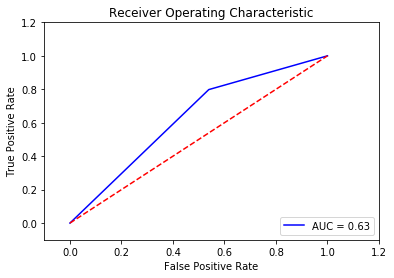

In [9]:
actual = y_test_svco
predictions=grid_o.best_estimator_.predict(X_test_svco)
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting

In [10]:
X_train_gb = df_train.iloc[:,4:14]
y_train_gb = df_train.iloc[:,-2]
X_test_gb = df_test.iloc[:,4:14]
y_test_gb = df_test.iloc[:,-2]

In [11]:
GB = GradientBoostingClassifier()
params = {'max_features': [0.3, 0.5, 1, 2], 'n_estimators': [10, 20, 30 ,40], 
          'max_depth': [4, 6, 8, 16], 'min_samples_leaf':[2, 4, 8]}
                
GBgrid = RandomizedSearchCV(param_distributions = params,
                            estimator=GB, 
                            cv=15, scoring = 'accuracy', n_iter=1)
GBgrid.fit(X_train_gb,y_train_gb)
print('best score', GBgrid.best_score_)
print('best params', GBgrid.best_params_)
print('best estimator',GBgrid.best_estimator_)

y_pred_best_gb = GBgrid.best_estimator_.fit(X_train_gb, y_train_gb).predict(X_test_gb)
accuracy_score(y_test_gb, y_pred_best_gb)

best score 0.866666666667
best params {'n_estimators': 20, 'min_samples_leaf': 8, 'max_features': 0.5, 'max_depth': 6}
best estimator GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=0.5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


0.64796747967479673

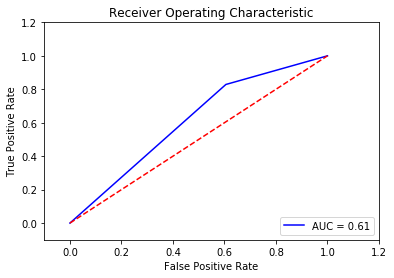

In [12]:
actual = y_test_gb
predictions=GBgrid.best_estimator_.predict(X_test_gb)
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

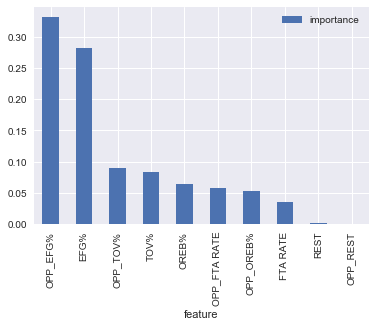

In [64]:
importances = pd.DataFrame()
importances['feature'] = features_names
importances['importance'] = GBgrid.best_estimator_.feature_importances_

importances
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar()

# Gradient Boosting with One-Hot Encoding

In [13]:
X_train_gbo = df_train_ohe.iloc[:,0:69]
y_train_gbo = df_train_ohe.iloc[:,-2]
X_test_gbo = df_test_ohe.iloc[:,0:69]
y_test_gbo = df_test_ohe.iloc[:,-2]

In [14]:
GB_o = GradientBoostingClassifier()
params = {'max_features': [0.3, 0.5, 1, 2], 'n_estimators': [10, 20, 30 ,40], 
          'max_depth': [4, 6, 8, 16], 'min_samples_leaf':[2, 4, 8]}
                
GBgrid_o = RandomizedSearchCV(param_distributions = params,
                            estimator=GB_o, 
                            cv=10, scoring = 'accuracy', n_iter=1)
GBgrid_o.fit(X_train_gbo,y_train_gbo)
print('best score', GBgrid_o.best_score_)
print('best params', GBgrid_o.best_params_)
print('best estimator',GBgrid_o.best_estimator_)

y_pred_best_gbo = GBgrid_o.best_estimator_.fit(X_train_gbo, y_train_gbo).predict(X_test_gbo)
accuracy_score(y_test_gbo, y_pred_best_gbo)

best score 0.887804878049
best params {'n_estimators': 40, 'min_samples_leaf': 8, 'max_features': 0.5, 'max_depth': 6}
best estimator GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=0.5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


0.64552845528455283

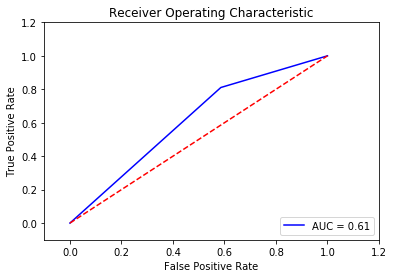

In [15]:
actual = y_test_gbo
predictions=GBgrid_o.best_estimator_.predict(X_test_gbo)
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Neural Network

In [16]:
X_train_nn = df_train.iloc[:,4:14]
y_train_nn = df_train.iloc[:,-2]
X_test_nn = df_test.iloc[:,4:14]
y_test_nn = df_test.iloc[:,-2]

In [17]:
scaler = StandardScaler()
scaler.fit(X_train_nn)
scaler.fit(X_test_nn)

X_train_nn = scaler.transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

In [22]:
mlp = MLPClassifier()

gs = GridSearchCV(mlp, cv=10, param_grid={
    'hidden_layer_sizes': [[5,5], [5,5,5], [10,10], [10,10,10]],
    'activation': ['identity', 'logistic', 'tanh','relu'],
    'solver': ["lbfgs", "adam", "sgd"],
    'max_iter':[500, 1000, 2000]
    })
gs.fit(X_train_nn, y_train_nn)

print('best score', gs.best_score_)
print('best params', gs.best_params_)
print('best estimator',gs.best_estimator_)

y_pred_best_nn = gs.best_estimator_.fit(X_train_nn, y_train_nn).predict(X_test_nn)
accuracy_score(y_test_nn, y_pred_best_nn)

/Users/ssui9307/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ssui9307/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ssui9307/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ssui9307/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't co

best score 0.949593495935
best params {'activation': 'identity', 'hidden_layer_sizes': [10, 10, 10], 'max_iter': 2000, 'solver': 'sgd'}
best estimator MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


0.66829268292682931

In [85]:
predictions_nn = gs.best_estimator_.predict(X_test_nn)
print(confusion_matrix(y_test_nn,predictions_nn))
print(classification_report(y_test_nn,predictions_nn))

[[237 275]
 [133 585]]
             precision    recall  f1-score   support

          0       0.64      0.46      0.54       512
          1       0.68      0.81      0.74       718

avg / total       0.66      0.67      0.66      1230



In [86]:
print(classification_report(y_test_nn[0:21],predictions_nn[0:21]))

             precision    recall  f1-score   support

          0       1.00      0.90      0.95        10
          1       0.92      1.00      0.96        11

avg / total       0.96      0.95      0.95        21



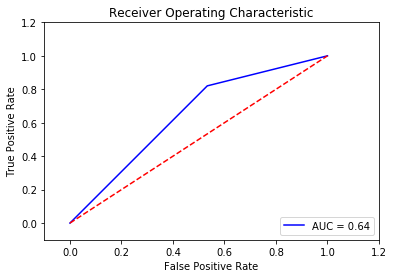

In [63]:
actual = y_test_nn
predictions=predictions_nn
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
importances = pd.DataFrame()
importances['feature'] = features_names
importances['importance'] = [y for x in gs.best_estimator_.coefs_ for y in x]

importances
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar()

ValueError: Length of values does not match length of index

# Neural Network with One-Hot Encoding

In [80]:
X_train_nno = df_train_ohe.iloc[:,0:70]
y_train_nno = df_train_ohe.iloc[:,-2]
X_test_nno = df_test_ohe.iloc[:,0:70]
y_test_nno = df_test_ohe.iloc[:,-2]

In [94]:
df_train_ohe.shape

(2460, 72)

In [81]:
scaler = StandardScaler()
scaler.fit(X_train_nno)
scaler.fit(X_test_nno)

X_train_nno = scaler.transform(X_train_nno)
X_test_nno = scaler.transform(X_test_nno)

In [82]:
mlp_ohe = MLPClassifier()

gs_ohe = GridSearchCV(mlp_ohe, cv=10, param_grid={
    'hidden_layer_sizes': [[5,5], [5,5,5], [10,10], [10,10,10]],
    'activation': ['identity', 'logistic', 'tanh','relu'],
    'solver': ["lbfgs", "adam", "sgd"],
    'max_iter':[500, 1000, 2000]
    })
gs_ohe.fit(X_train_nno, y_train_nno)

print('best score', gs_ohe.best_score_)
print('best params', gs_ohe.best_params_)
print('best estimator',gs_ohe.best_estimator_)

y_pred_best_nno = gs_ohe.best_estimator_.fit(X_train_nno, y_train_nno).predict(X_test_nno)
accuracy_score(y_test_nno, y_pred_best_nno)

/Users/ssui9307/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ssui9307/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ssui9307/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ssui9307/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't co

best score 0.937804878049
best params {'activation': 'identity', 'hidden_layer_sizes': [10, 10, 10], 'max_iter': 1000, 'solver': 'sgd'}
best estimator MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


0.65528455284552845

In [83]:
predictions_nno = gs_ohe.best_estimator_.predict(X_test_nno)
print(confusion_matrix(y_test_nno,predictions_nno))
print(classification_report(y_test_nno,predictions_nno))

[[809 421]
 [427 803]]
             precision    recall  f1-score   support

          0       0.65      0.66      0.66      1230
          1       0.66      0.65      0.65      1230

avg / total       0.66      0.66      0.66      2460



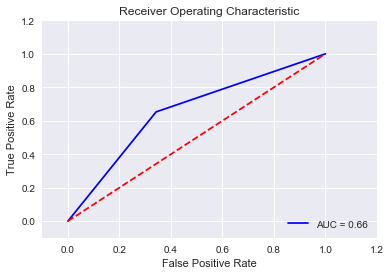

In [84]:
actual = y_test_nno
predictions=predictions_nno
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [87]:
import pickle

In [88]:
NN_ohe = gs_ohe.best_estimator_.fit(X_train_nno, y_train_nno)

In [89]:
filename = 'finalized_model_classification.sav'
pickle.dump(NN_ohe, open(filename, 'wb'))